# 📚 Multi-Agents System for Math Problem Solving

- 🏫 Level 1 Agent – School Students
- 🎓 Level 2 Agent – College Students
- 🎓👨‍🎓 Level 3 Agent – University Students


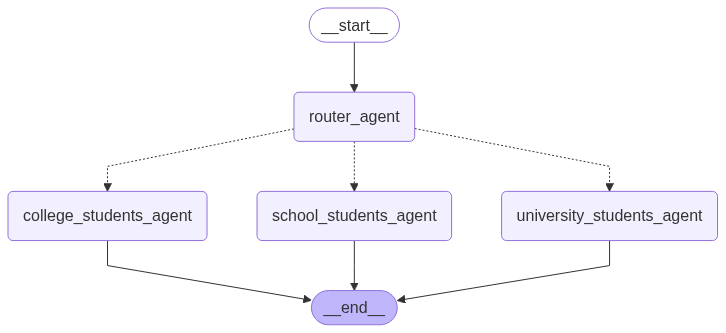

# 🔧 Import Libraries

In [2]:
# install Libraries

!pip install langchain langgraph langsmith langchain-groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 10.2 MB/s eta 0:00:00


In [3]:
# ============================
# Standard Library
# ============================
import os  # OS interactions (e.g., environment variables)

# ============================
# Typing Utilities
# ============================
from typing import Annotated, Literal  # Type hints (metadata + fixed values)
from typing_extensions import TypedDict  # Structured typing (for older Python versions)

# ============================
# LangGraph: Stateful Workflows
# ============================
from langgraph.graph import StateGraph, START, END  # Core state machine primitives
from langgraph.prebuilt import create_react_agent  # Prebuilt ReAct agent constructor

# ============================
# LangChain: LLMs & Tools
# ============================
from langchain_groq import ChatGroq  # Groq LLM integration
from langchain_core.tools import tool  # Decorator for tool definition


# 🌐 LLM Model API Integration

In [4]:
# Groq API
groq_api_key = "your api key"

In [5]:
# LLM Model
llm = ChatGroq(model="llama3-70b-8192", groq_api_key=groq_api_key)

# 🔗 State

In [6]:
# State
class State(TypedDict):
  messages: Annotated[list, "add_messages"]
  answer: str

# ⚙️ Agent Tools


In [38]:
# ============================
# Agent Tools Class
# ============================

# ----------------------------
# Basic Math Solver Tool
# ----------------------------
class basic_math_solver:
    """Tool for solving basic arithmetic, introductory algebra, and geometry problems."""

    @staticmethod
    @tool
    def call(query: str) -> str:
        """
        Solve basic arithmetic, introductory algebra, or geometry problems.

        Focus:
            - Basic arithmetic: addition, subtraction, multiplication, division, powers
            - Introductory algebra: simplifying expressions, solving simple equations
            - Basic geometry: evaluating formulas for area, perimeter, etc.

        Args:
            query (str): A beginner-level math question or expression. Examples:
                - "12 + 7 * 3"
                - "Simplify 2x + 3x - 5"
                - "Solve 2*x + 3 = 11 for x"
                - "What is the area of a triangle with base 5 and height 10?"

        Returns:
            str: Clear step-by-step explanation suitable for beginners,
                 using simple analogies and child-friendly terms.
        """
        try:
            prompt = f"""
You are a kind and patient math tutor who specializes in **basic math** for beginners and children.
Solve this problem step-by-step in simple, clear terms:
{query}
"""
            response = llm.invoke(prompt)
            return response.strip()
        except Exception as e:
            return f"Sorry, I couldn't solve the problem due to an error: {str(e)}"


# ----------------------------
# Intermediate Math Solver Tool
# ----------------------------
class intermediate_math_llm_solver:
    """
    Tool for solving intermediate-level math problems: Algebra, Trigonometry, Calculus basics, and Probability.
    """

    @staticmethod
    @tool
    def call(query: str) -> str:
        """
        Solve intermediate-level math problems with detailed, step-by-step explanations.

        Topics:
            - Algebra: equations, expressions, simplification
            - Trigonometry: functions, identities, angle problems
            - Calculus basics: derivatives, limits, simple integrals
            - Probability: factorials, permutations, combinations, simple probability problems

        The tool also provides engaging and relatable examples to reinforce understanding.

        Args:
            query (str): An intermediate-level math problem. Examples:
                - "Simplify (2x - 3)(x + 4)"
                - "Find the derivative of x^3 + 2x"
                - "What is sin(30 degrees)?"
                - "How many ways to choose 3 out of 5 people?"

        Returns:
            str: Step-by-step solution using proper mathematical notation,
                 with hints for learning reinforcement and illustrative examples.

        Raises:
            Exception: If the LLM tool fails or returns an invalid response.

        Example:
            >>> intermediate_math_llm_solver.call("Simplify (2x - 3)(x + 4)")
            '2x^2 + 5x - 12'
        """
        try:
            prompt = f"""
You are an expert math tutor specialized in **intermediate mathematics**, including:

- Algebra (equations, expressions, simplification)
- Trigonometry (functions, identities, angle problems)
- Calculus basics (derivatives, limits, simple integrals)
- Probability (factorials, permutations, combinations, simple probability questions)

Please solve this problem step-by-step:
{query}

Provide clear explanations, short hints for learning reinforcement,
and interesting examples to help understanding.
"""
            response = llm.invoke(prompt)
            return response.strip()
        except Exception as e:
            return f"Sorry, I couldn't solve the problem due to an error: {str(e)}"



# ----------------------------
# Advanced Math Solver Tool
# ----------------------------
class advanced_math_solver:
    """Tool for solving advanced mathematics: Linear Algebra, Calculus, Differential Equations, Abstract Algebra, Statistics, Optimization."""

    @staticmethod
    @tool
    def call(query: str) -> str:
        """
        Solve advanced mathematics problems with rigorous explanations.

        Topics:
            - Linear Algebra: matrix operations, eigenvalues, vector spaces
            - Calculus: multivariable, advanced integrals, limits
            - Differential Equations: ODEs, PDEs, analytical solutions
            - Abstract Algebra: groups, rings, fields
            - Statistics & Probability: distributions, hypothesis testing
            - Optimization: Lagrange multipliers, convex analysis

        Args:
            query (str): Advanced-level math problem. Examples:
                - "Solve the system Ax = b using LU decomposition"
                - "Prove that a group of prime order is cyclic"
                - "Find the maximum of f(x, y) = x² + y² subject to x + y = 1"
                - "Solve the differential equation dy/dx + y = e^x"

        Returns:
            str: Detailed, step-by-step solution with rigorous reasoning,
                 formal mathematical notation, and proofs when necessary.
        """
        try:
            prompt = f"""
You are an expert mathematician and teacher. Solve **advanced mathematics problems** and provide a detailed, step-by-step explanation including intermediate steps and reasoning.

Topics include:
- Linear Algebra (matrix operations, eigenvalues, vector spaces)
- Calculus (multivariable, advanced integrals, limits)
- Differential Equations (ODEs, PDEs)
- Abstract Algebra (groups, rings, fields)
- Statistics & Probability (distributions, hypothesis testing)
- Optimization (Lagrange multipliers, convex analysis)

Solve this problem:
{query}
"""
            response = llm.invoke(prompt)
            return response.strip()
        except Exception as e:
            return f"Sorry, I couldn't solve the problem due to an error: {str(e)}"


# 🤖 Create Agents

In [39]:
# ---------------------------------
# Router Agent / Supervisor Agent
# ---------------------------------

def router_agent(state: State) -> State:
    """
    Route user queries to the appropriate math agent.

    This function supervises the system by directing queries to the correct
    specialized agent (school, college, or university). The routing decision
    is determined by the external `routing_logic` function. The agent itself
    does not perform problem-solving.

    Args:
        state (State): A state object containing conversation history. Must
            include a "messages" key with the user query.

    Returns:
        State: Updated state with the solution inserted into `state["answer"]`.

    Raises:
        ValueError: If `routing_logic` returns an unknown agent name.
    """
    #print("--- Router Agent ---")

    if not state.get("messages"):
        state["messages"] = [input("Input User Query: ")]

    chosen_agent_name = routing_logic(state)

    # Print query and LLM decision once here
    #print(f"LLM Decision: {chosen_agent_name}")

    if chosen_agent_name == "school_students_agent":
        state = school_students_agent(state)
    elif chosen_agent_name == "college_students_agent":
        state = college_students_agent(state)
    elif chosen_agent_name == "university_students_agent":
        state = university_students_agent(state)
    else:
        raise ValueError(f"routing_logic returned unknown agent: {chosen_agent_name}")

    return state


# ---------------------------------
# School Students Agent
# ---------------------------------

def school_students_agent(state: State) -> State:
    """
    Solve math problems for school-level students.

    This agent handles:
        - Basic arithmetic (addition, subtraction, multiplication, division)
        - Introductory algebra (simple equations, expressions)
        - Basic geometry (area, perimeter, simple shapes)

    Delegates computation to `basic_math_solver`, ensuring clear and
    child-friendly explanations.

    Args:
        state (State): A state object containing the query under "messages".

    Returns:
        State: Updated state with the solution stored in `state["answer"]`.
    """
    #print("--- School Students Agent ---")
    agent = create_react_agent(
        model=llm,
        tools=[basic_math_solver.call]
    )
    result = agent.invoke({"messages": state["messages"]})
    state["answer"] = result["messages"][-1].content

    return state


# ---------------------------------
# College Students Agent
# ---------------------------------

def college_students_agent(state: State) -> State:
    """
    Solve math problems for college-level students.

    This agent handles intermediate mathematics, including:
        - Algebra: equations, factorization, simplification
        - Trigonometry: identities, functions, angle problems
        - Calculus basics: derivatives, limits, simple integrals
        - Probability: factorials, permutations, combinations

    The agent delegates computation to `intermediate_math_llm_solver`,
    which provides step-by-step solutions with proper mathematical notation
    and concise learning hints. It does not modify the query content.

    Args:
        state (State): A state object containing the latest user query under
            the "messages" key.

    Returns:
        State: The updated state object with the computed solution stored in
            `state["answer"]`.

    Raises:
        Exception: If the LLM tool fails or returns an invalid response.

    Example:
        >>> state = {"messages": ["Simplify (2x - 3)(x + 4)"]}
        >>> updated_state = college_students_agent(state)
        >>> print(updated_state["answer"])
        '2x^2 + 5x - 12'
    """
    agent = create_react_agent(
        model=llm,
        tools=[intermediate_math_llm_solver.call]
    )
    result = agent.invoke({"messages": state["messages"]})
    state["answer"] = result["messages"][-1].content

    return state



# ---------------------------------
# University Students Agent
# ---------------------------------

def university_students_agent(state: State) -> State:
    """
    Solve math problems for university-level students.

    This agent handles:
        - Linear Algebra (matrices, eigenvalues, vector spaces)
        - Multivariable Calculus (partial derivatives, advanced integrals)
        - Differential Equations (ODEs, PDEs)
        - Abstract Algebra (groups, rings, fields)
        - Statistics (distributions, hypothesis testing)
        - Optimization (Lagrange multipliers, convex analysis)

    Delegates computation to `advanced_math_solver` for rigorous,
    formal solutions with proofs or applications where necessary.

    Args:
        state (State): A state object containing the query under "messages".

    Returns:
        State: Updated state with the solution stored in `state["answer"]`.
    """
    #print("--- University Students Agent ---")
    agent = create_react_agent(
        model=llm,
        tools=[advanced_math_solver.call]
    )
    result = agent.invoke({"messages": state["messages"]})
    state["answer"] = result["messages"][-1].content

    return state


# 🔀 Routing Logic

In [29]:

#creating a dictionary that maps agent names to their docstrings (__doc__).
agent_docs = {"school_students_agent": school_students_agent.__doc__,
              "college_students_agent": college_students_agent.__doc__,
              "university_students_agent": university_students_agent.__doc__, }
# ---------------------------------
# Routing Logic
# ---------------------------------


def routing_logic(state: dict) -> Literal[
    "school_students_agent",
    "college_students_agent",
    "university_students_agent"
]:
    """
    Determine the appropriate math agent for the given query using LLM-based routing.

    The function inspects the latest user query in `state["messages"]` and builds
    an LLM prompt that describes available agents and their responsibilities.
    The LLM then selects which agent should handle the query.

    Args:
        state (dict): State object containing conversation history. Must include
            a "messages" key with at least one user query.

    Returns:
        Literal: The chosen agent name. One of:
            - "school_students_agent"
            - "college_students_agent"
            - "university_students_agent"

    Raises:
        KeyError: If `state` does not contain "messages" with at least one query.
        ValueError: If the LLM returns an invalid agent name.

    Example:
        >>> state = {"messages": ["Find the derivative of 3x^2 + 5x"]}
        >>> routing_logic(state)
        'college_students_agent'
    """
    try:
        query = state["messages"][-1]
    except (KeyError, IndexError):
        raise KeyError("State must contain 'messages' with at least one user query.")

    prompt = f"""
    You are a routing agent. Determine whether the following query is for basic,
    intermediate, or advanced mathematics:

    Query: {query}

    Available Agents:
    - school_students_agent: {agent_docs['school_students_agent']}
    - college_students_agent: {agent_docs['college_students_agent']}
    - university_students_agent: {agent_docs['university_students_agent']}

    Respond with ONLY the agent name.
    """

    response = llm.invoke(prompt)
    decision = response.content.strip().lower()
    # Print once at router level
    #print("--- Router Agent ---")
    print(f"Query: {query}")
    print(f"LLM decision: {decision}")

    valid_agents = [
        "school_students_agent",
        "college_students_agent",
        "university_students_agent"
    ]
    if decision not in valid_agents:
        raise ValueError(f"Invalid decision from LLM: {decision}")

    return decision


# 🛤️ Workflow

In [10]:
# ============================
# --- Create Workflow Graph ---
# ============================

graph_workflow = StateGraph(State)


# Node names same as routing_logic output
graph_workflow.add_node("router_agent", router_agent)
graph_workflow.add_node("school_students_agent", school_students_agent)
graph_workflow.add_node("college_students_agent", college_students_agent)
graph_workflow.add_node("university_students_agent", university_students_agent)



# Add edges
graph_workflow.add_edge(START, "router_agent")

# Conditional edges from RouterAgent: based on routing_logic output
# Conditional edges mapping becomes identity
graph_workflow.add_conditional_edges(
    "router_agent",
    routing_logic,
    {
        "school_students_agent": "school_students_agent",
        "college_students_agent": "college_students_agent",
        "university_students_agent": "university_students_agent"
    }
)
# End edges
graph_workflow.add_edge("school_students_agent", END)
graph_workflow.add_edge("college_students_agent", END)
graph_workflow.add_edge("university_students_agent", END)

# Compile the workflow
agents = graph_workflow.compile()


# 📊 Display Workflow Graph

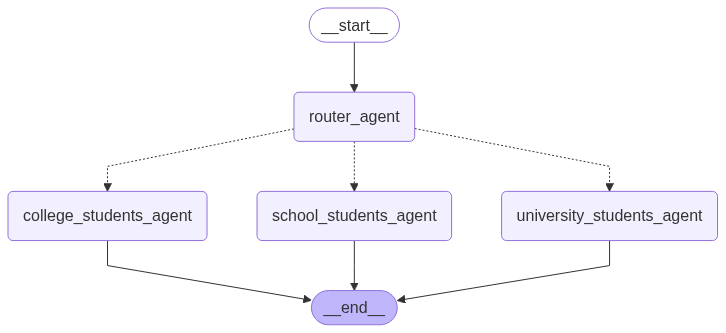

In [11]:
#Display Multi Agents Graph
from IPython.display import Image, display
display(Image(agents.get_graph().draw_mermaid_png()))

## ✅ Results

### School Math

In [34]:
# ============================
# Multi-Agent Math Problem Solver
# ============================

while True:
    try:
        user_input = input(
            "Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): "
        ).strip()

        # Exit condition
        if user_input.lower() in ['exit', 'quit']:
            print("Exiting...")
            break

        # Invoke agents workflow
        result = agents.invoke({"messages": [user_input], "answer": ""})
        print(f"\n✅ Final Answer: {result['answer']}\n")

    except KeyboardInterrupt:
        print("\nExiting...")
        break

    except Exception as e:
        print(f"\n❌ Error processing query: {str(e)}\n")
        continue


Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): 5+6
--- Router Agent ---
Query: 5+6
LLM decision: school_students_agent
LLM decision: school_students_agent
--- School Students Agent ---

✅ Final Answer: The answer is 11.

Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): 2x + 3y =10, if x=4 and what is the value of y?
--- Router Agent ---
Query: 2x + 3y =10, if x=4 and what is the value of y?
LLM decision: school_students_agent
LLM decision: school_students_agent
--- School Students Agent ---

✅ Final Answer: Let's try a different approach. 

Since we have a simple algebra problem, we can solve it directly.

Given the equation 2x + 3y = 10 and x = 4, we can substitute x with 4 to get:

2(4) + 3y = 10
8 + 3y = 10

Subtract 8 from both sides:

3y = 2

Divide both sides by 3:

y = 2/3

So, the value of y is 2/3.

Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): Length = 6 and width = 4, what is the area of rectangle?
--- Router Agent ---
Que

### College Math

In [41]:
# ============================
# Multi-Agent Math Problem Solver
# ============================

while True:
    try:
        user_input = input(
            "Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): "
        ).strip()

        # Exit condition
        if user_input.lower() in ['exit', 'quit']:
            print("Exiting...")
            break

        # Invoke agents workflow
        result = agents.invoke({"messages": [user_input], "answer": ""})
        print(f"\n✅ Final Answer: {result['answer']}\n")

    except KeyboardInterrupt:
        print("\nExiting...")
        break

    except Exception as e:
        print(f"\n❌ Error processing query: {str(e)}\n")
        continue


Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): Solve  sin ⁡ 2 ( 𝑥 ) + cos ⁡ 2 ( 𝑥 ) = 1 sin 2 (x)+cos 2 (x)=1 for  𝑥 x in [0, 2π]
--- Router Agent ---
Query: Solve  sin ⁡ 2 ( 𝑥 ) + cos ⁡ 2 ( 𝑥 ) = 1 sin 2 (x)+cos 2 (x)=1 for  𝑥 x in [0, 2π]
LLM decision: college_students_agent
LLM decision: college_students_agent
--- College Students Agent ---

✅ Final Answer: The given equation sin(2x) + cos(2x) = 1 is not an identity. The Pythagorean identity is sin^2(x) + cos^2(x) = 1, not sin(2x) + cos(2x) = 1.

Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): A box has 3 red balls and 2 blue balls. Two balls are drawn at random. Probability both are red?
--- Router Agent ---
Query: A box has 3 red balls and 2 blue balls. Two balls are drawn at random. Probability both are red?
LLM decision: college_students_agent
LLM decision: college_students_agent
--- College Students Agent ---

✅ Final Answer: The probability of drawing 2 red balls from a box with 3 red balls a

In [42]:
# ============================
# Multi-Agent Math Problem Solver
# ============================

while True:
    try:
        user_input = input(
            "Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): "
        ).strip()

        # Exit condition
        if user_input.lower() in ['exit', 'quit']:
            print("Exiting...")
            break

        # Invoke agents workflow
        result = agents.invoke({"messages": [user_input], "answer": ""})
        print(f"\n✅ Final Answer: {result['answer']}\n")

    except KeyboardInterrupt:
        print("\nExiting...")
        break

    except Exception as e:
        print(f"\n❌ Error processing query: {str(e)}\n")
        continue


Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): Solve That: (dx/dy)+y=e^x
--- Router Agent ---
Query: Solve That: (dx/dy)+y=e^x
LLM decision: college_students_agent
LLM decision: college_students_agent
--- College Students Agent ---

✅ Final Answer: The differential equation (dx/dy) + y = e^x is a first-order linear differential equation. To solve it, we can use an integrating factor.

First, we can rewrite the equation as dy/dx + y = e^x.

The integrating factor is μ(x) = e^∫(1)dx = e^x.

Multiplying both sides of the equation by the integrating factor, we get:

e^x * (dy/dx) + e^x * y = e^(2x)

Now, we can see that the left-hand side is the derivative of e^x * y, so we can rewrite the equation as:

d(e^x * y)/dx = e^(2x)

Integrating both sides, we get:

e^x * y = (1/2)e^(2x) + C

where C is the constant of integration.

Dividing both sides by e^x, we get:

y = (1/2)e^x + Ce^(-x)

This is the general solution to the differential equation.

Multi-Agent Math Problem So

### University Math Solver

In [43]:
# ============================
# Multi-Agent Math Problem Solver
# ============================

while True:
    try:
        user_input = input(
            "Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): "
        ).strip()

        # Exit condition
        if user_input.lower() in ['exit', 'quit']:
            print("Exiting...")
            break

        # Invoke agents workflow
        result = agents.invoke({"messages": [user_input], "answer": ""})
        print(f"\n✅ Final Answer: {result['answer']}\n")

    except KeyboardInterrupt:
        print("\nExiting...")
        break

    except Exception as e:
        print(f"\n❌ Error processing query: {str(e)}\n")
        continue



Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): Compute the partial derivatives of f(x,y)=x^2+y+3xy^2
--- Router Agent ---
Query: Compute the partial derivatives of f(x,y)=x^2+y+3xy^2
LLM decision: university_students_agent
LLM decision: university_students_agent
--- University Students Agent ---

✅ Final Answer: To find the partial derivatives of f(x,y) = x^2 + y + 3xy^2, we can use the following formulas:

∂f/∂x = ∂(x^2 + y + 3xy^2)/∂x = 2x + 3y^2
∂f/∂y = ∂(x^2 + y + 3xy^2)/∂y = 1 + 6xy

So, the partial derivatives are ∂f/∂x = 2x + 3y^2 and ∂f/∂y = 1 + 6xy.

Multi-Agent Math Problem Solver (type 'exit' or 'quit' to stop): Solve the ODE : (dx/dy)−2y=e^3x
--- Router Agent ---
Query: Solve the ODE : (dx/dy)−2y=e^3x
LLM decision: university_students_agent
LLM decision: university_students_agent
--- University Students Agent ---

✅ Final Answer: I apologize for the inconvenience. It seems that the tool is not working correctly. In this case, I'll try to solve the ODE manu